In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv(r"D:\Data\logistic regression\heart attack prediction\framingham.csv")
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
dataset.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [21]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot: >

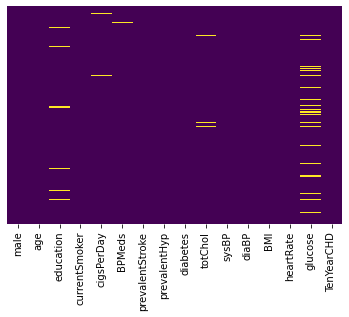

In [22]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
dataset.dropna(subset = ['education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate'],
                         inplace = True)


In [24]:
dataset.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            331
TenYearCHD           0
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset.iloc[:, 14:15])
dataset.iloc[:, 14:15] = imputer.transform(dataset.iloc[:, 14:15])

In [31]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [69]:
dataset.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022661,0.012988,0.201365,0.326439,-0.050024,-0.003618,0.007099,0.016915,-0.068606,-0.033550,0.058443,0.078999,-0.115639,0.002927,0.091301
age,-0.022661,1.000000,-0.160599,-0.213758,-0.190422,0.128390,0.045036,0.304913,0.104718,0.269356,0.390079,0.206722,0.134364,-0.008313,0.113621,0.229569
education,0.012988,-0.160599,1.000000,0.018366,0.006260,-0.010029,-0.028540,-0.081717,-0.034684,-0.022649,-0.128381,-0.063712,-0.136001,-0.058138,-0.030581,-0.053974
currentSmoker,0.201365,-0.213758,0.018366,1.000000,0.770785,-0.048925,-0.032537,-0.105285,-0.040233,-0.048969,-0.130845,-0.109655,-0.164752,0.051932,-0.051080,0.022244
cigsPerDay,0.326439,-0.190422,0.006260,0.770785,1.000000,-0.043958,-0.033948,-0.066404,-0.036184,-0.026239,-0.087924,-0.051174,-0.087372,0.067597,-0.051539,0.059259
BPMeds,-0.050024,0.128390,-0.010029,-0.048925,-0.043958,1.000000,0.127479,0.259707,0.047630,0.086113,0.260429,0.196103,0.102983,0.016325,0.052774,0.089835
prevalentStroke,-0.003618,0.045036,-0.028540,-0.032537,-0.033948,0.127479,1.000000,0.067315,0.009539,0.007950,0.055170,0.049318,0.031380,-0.012109,0.015680,0.044821
prevalentHyp,0.007099,0.304913,-0.081717,-0.105285,-0.066404,0.259707,0.067315,1.000000,0.075064,0.165329,0.693985,0.615394,0.304445,0.151672,0.083585,0.176389
diabetes,0.016915,0.104718,-0.034684,-0.040233,-0.036184,0.047630,0.009539,0.075064,1.000000,0.044473,0.101061,0.051326,0.082742,0.051474,0.608154,0.089268
totChol,-0.068606,0.269356,-0.022649,-0.048969,-0.026239,0.086113,0.007950,0.165329,0.044473,1.000000,0.214726,0.172057,0.122963,0.088371,0.047721,0.082359


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Heart Attack risk')

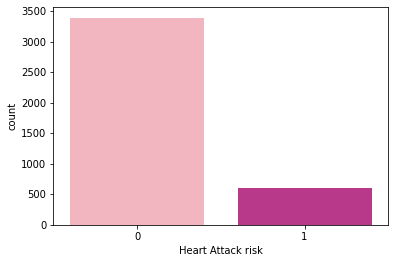

In [74]:
sns.countplot(data = dataset, x = 'TenYearCHD', palette= 'RdPu')
plt.xlabel('Heart Attack risk')

<IPython.core.display.Javascript object>

<AxesSubplot: >

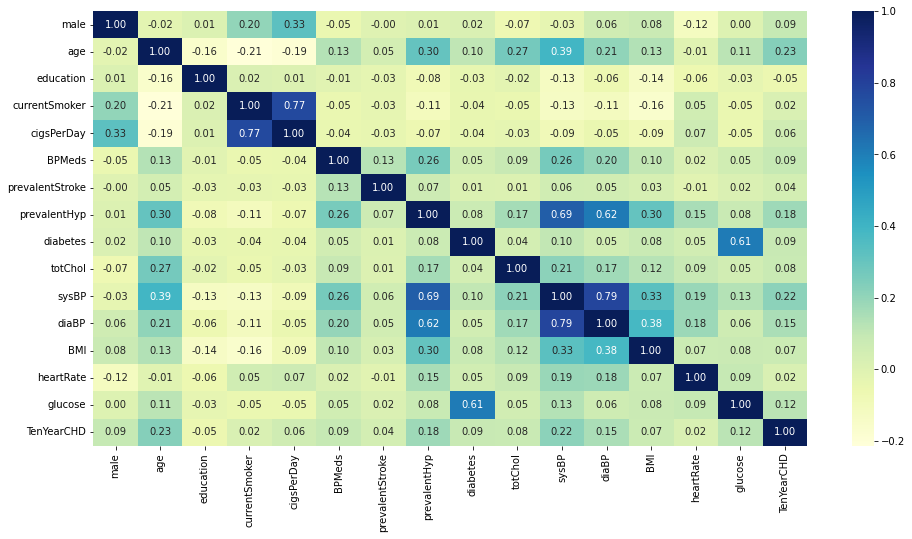

In [72]:
plt.figure(figsize= (16, 8))
sns.heatmap(dataset.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [32]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [33]:
print(x)

[[  1.          39.           4.         ...  26.97        80.
   77.        ]
 [  0.          46.           2.         ...  28.73        95.
   76.        ]
 [  1.          48.           1.         ...  25.34        75.
   70.        ]
 ...
 [  1.          51.           3.         ...  19.71        65.
   68.        ]
 [  0.          44.           1.         ...  19.16        86.
   81.85612691]
 [  0.          52.           2.         ...  21.47        80.
  107.        ]]


In [34]:
print(y)

[0 0 0 ... 0 0 0]


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

<IPython.core.display.Javascript object>

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [41]:
y_pred = classifier.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % accuracy)

Confusion matrix:
[[672   8]
 [109   9]]


In [66]:
classifier.score(x_train, y_train)

0.8579492003762935

In [65]:
classifier.score(x_test, y_test)

0.8533834586466166

In [50]:
y_test_v = y_test.reshape(len(y_test), 1)
y_pred_v = y_pred.reshape(len(y_pred), 1)

print(np.concatenate((y_test_v, y_pred_v), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [85]:
y_pred_d = pd.DataFrame(y_pred, columns = ['y_pred'])
y_test_d = pd.DataFrame(y_test, columns = ['y_test'])


In [91]:
test_vs_pred = pd.merge(y_test_d, y_pred_d, left_index = True, right_index = True)
test_vs_pred

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
793,0,0
794,0,0
795,0,0
796,0,0


In [92]:
y_pred_d.value_counts()

y_pred
0         781
1          17
dtype: int64

In [93]:
y_test_d.value_counts()

y_test
0         680
1         118
dtype: int64

In [94]:
test_vs_pred.value_counts()

y_test  y_pred
0       0         672
1       0         109
        1           9
0       1           8
dtype: int64